In [1]:
# notebooks/01_data_exploration.ipynb

# Cell 1: Install dependencies
!pip install transformers datasets evaluate seqeval accelerate wandb
!pip install pandas numpy matplotlib seaborn
!pip install sentencepiece sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 35.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.3 MB/s eta 0:00:0000:0100:

In [2]:
# Cell 2: Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset, DatasetDict
from collections import Counter
import random


In [3]:
# Cell 3: Load and explore dataset
print("Loading WikiANN dataset...")
dataset = load_dataset("wikiann", "en")  # Start with English

print(f"Dataset structure: {dataset}")
print(f"Train samples: {len(dataset['train'])}")
print(f"Validation samples: {len(dataset['validation'])}")
print(f"Test samples: {len(dataset['test'])}")


Loading WikiANN dataset...


README.md: 0.00B [00:00, ?B/s]

en/validation-00000-of-00001.parquet:   0%|          | 0.00/748k [00:00<?, ?B/s]

en/test-00000-of-00001.parquet:   0%|          | 0.00/748k [00:00<?, ?B/s]

en/train-00000-of-00001.parquet:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Dataset structure: DatasetDict({
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'spans'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'spans'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'spans'],
        num_rows: 20000
    })
})
Train samples: 20000
Validation samples: 10000
Test samples: 10000


In [4]:
# Cell 4: Show sample data
def show_sample(dataset, sample_idx=0):
    sample = dataset['train'][sample_idx]
    print(f"Tokens: {sample['tokens'][:10]}...")
    print(f"NER tags: {sample['ner_tags'][:10]}...")
    print(f"Language: {sample['langs']}")
    print(f"Spans: {sample['spans']}")
    
show_sample(dataset)


Tokens: ['R.H.', 'Saunders', '(', 'St.', 'Lawrence', 'River', ')', '(', '968', 'MW']...
NER tags: [3, 4, 0, 3, 4, 4, 0, 0, 0, 0]...
Language: ['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en']
Spans: ['ORG: R.H. Saunders', 'ORG: St. Lawrence River']


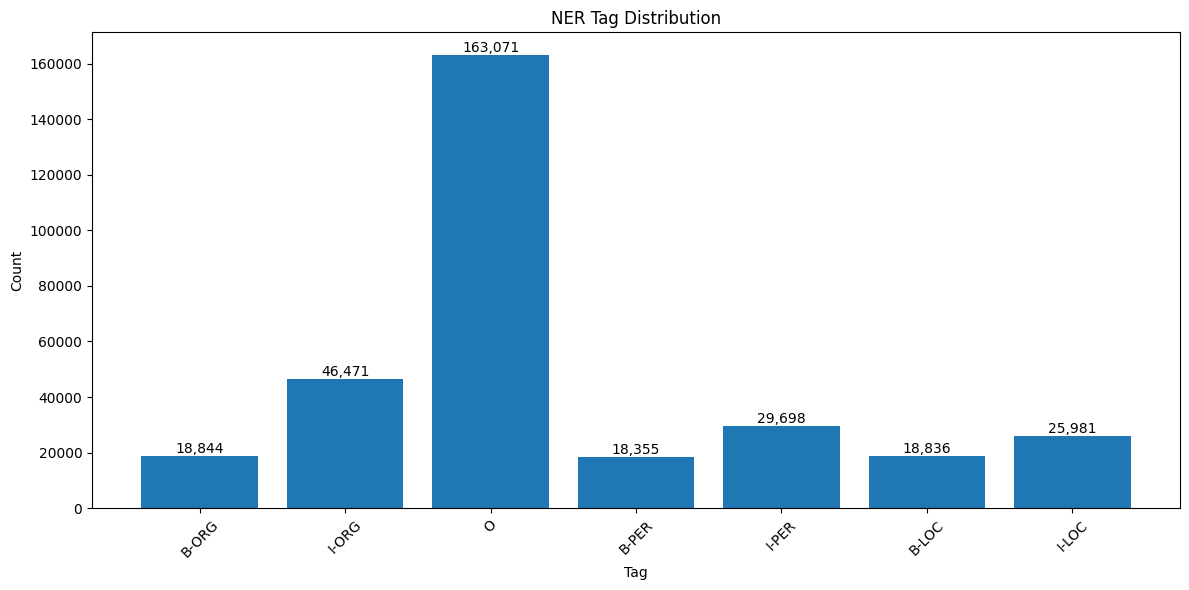

In [5]:
# Cell 5: NER tag distribution
def plot_ner_distribution(dataset):
    all_tags = []
    for split in ['train', 'validation', 'test']:
        tags = [tag for sample in dataset[split] for tag in sample['ner_tags']]
        all_tags.extend(tags)
    
    tag_counts = Counter(all_tags)
    
    # Map tag indices to names (WikiANN uses CoNLL-2003 format)
    tag_names = {
        0: 'O',
        1: 'B-PER', 2: 'I-PER',
        3: 'B-ORG', 4: 'I-ORG',
        5: 'B-LOC', 6: 'I-LOC'
    }
    
    tag_labels = [tag_names.get(tag, str(tag)) for tag in tag_counts.keys()]
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(tag_counts)), tag_counts.values())
    plt.xticks(range(len(tag_counts)), tag_labels, rotation=45)
    plt.title('NER Tag Distribution')
    plt.xlabel('Tag')
    plt.ylabel('Count')
    
    # Add count labels on bars
    for bar, count in zip(bars, tag_counts.values()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{count:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('ner_tag_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()

plot_ner_distribution(dataset)

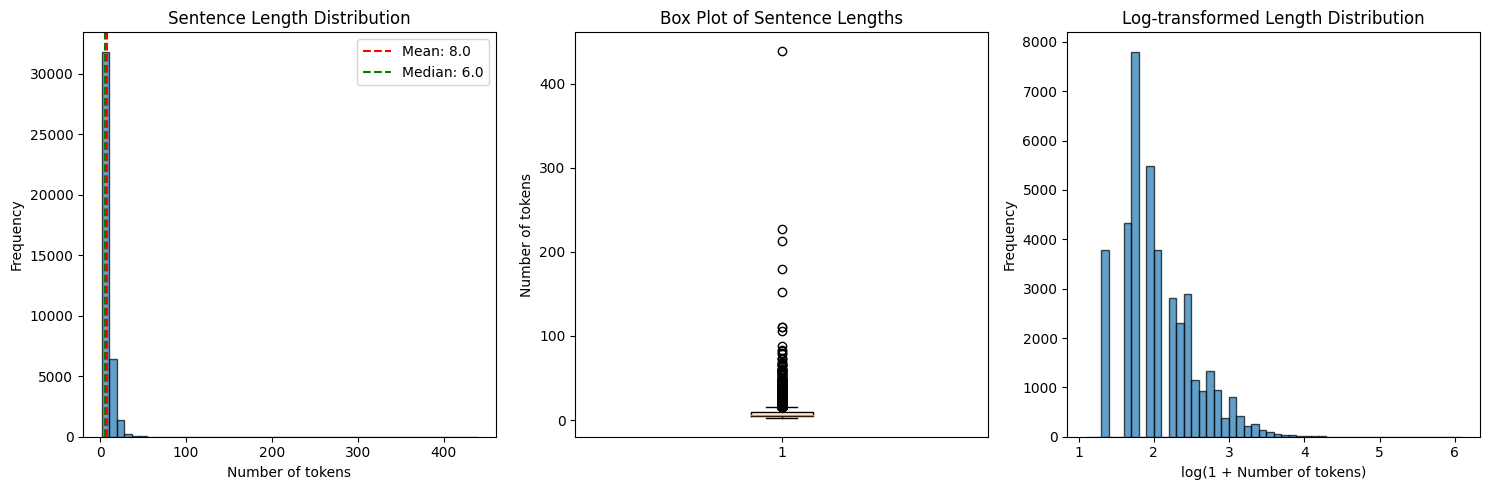

Statistics:
  Min length: 2
  Max length: 439
  Mean length: 8.03
  Std length: 6.24
  95th percentile: 19.00


In [6]:
# Cell 6: Sentence length analysis
def analyze_sentence_lengths(dataset):
    lengths = []
    for split in ['train', 'validation', 'test']:
        split_lengths = [len(sample['tokens']) for sample in dataset[split]]
        lengths.extend(split_lengths)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(lengths, bins=50, edgecolor='black', alpha=0.7)
    plt.title('Sentence Length Distribution')
    plt.xlabel('Number of tokens')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(lengths), color='r', linestyle='--', 
                label=f'Mean: {np.mean(lengths):.1f}')
    plt.axvline(np.median(lengths), color='g', linestyle='--', 
                label=f'Median: {np.median(lengths):.1f}')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.boxplot(lengths)
    plt.title('Box Plot of Sentence Lengths')
    plt.ylabel('Number of tokens')
    
    plt.subplot(1, 3, 3)
    # Log scale for better visualization
    plt.hist(np.log1p(lengths), bins=50, edgecolor='black', alpha=0.7)
    plt.title('Log-transformed Length Distribution')
    plt.xlabel('log(1 + Number of tokens)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('sentence_length_analysis.png', dpi=150)
    plt.show()
    
    print(f"Statistics:")
    print(f"  Min length: {min(lengths)}")
    print(f"  Max length: {max(lengths)}")
    print(f"  Mean length: {np.mean(lengths):.2f}")
    print(f"  Std length: {np.std(lengths):.2f}")
    print(f"  95th percentile: {np.percentile(lengths, 95):.2f}")
    
    return lengths

lengths = analyze_sentence_lengths(dataset)

In [7]:
# Cell 7: Load multiple languages for cross-lingual analysis
def load_multilingual_data(languages=['en', 'de', 'fr', 'es', 'ru']):
    multilingual_data = {}
    
    for lang in languages:
        try:
            print(f"Loading {lang} data...")
            dataset = load_dataset("wikiann", lang)
            multilingual_data[lang] = dataset
        except Exception as e:
            print(f"Failed to load {lang}: {e}")
    
    return multilingual_data

In [9]:
print(f"Type of sample: {type(dataset['train'][0])}")
print(f"Content of sample: {dataset['train'][0]}")

Type of sample: <class 'dict'>
Content of sample: {'tokens': ['R.H.', 'Saunders', '(', 'St.', 'Lawrence', 'River', ')', '(', '968', 'MW', ')'], 'ner_tags': [3, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0], 'langs': ['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en'], 'spans': ['ORG: R.H. Saunders', 'ORG: St. Lawrence River']}


Loading en data...
Loading de data...
Loading fr data...
Loading es data...
Loading ru data...


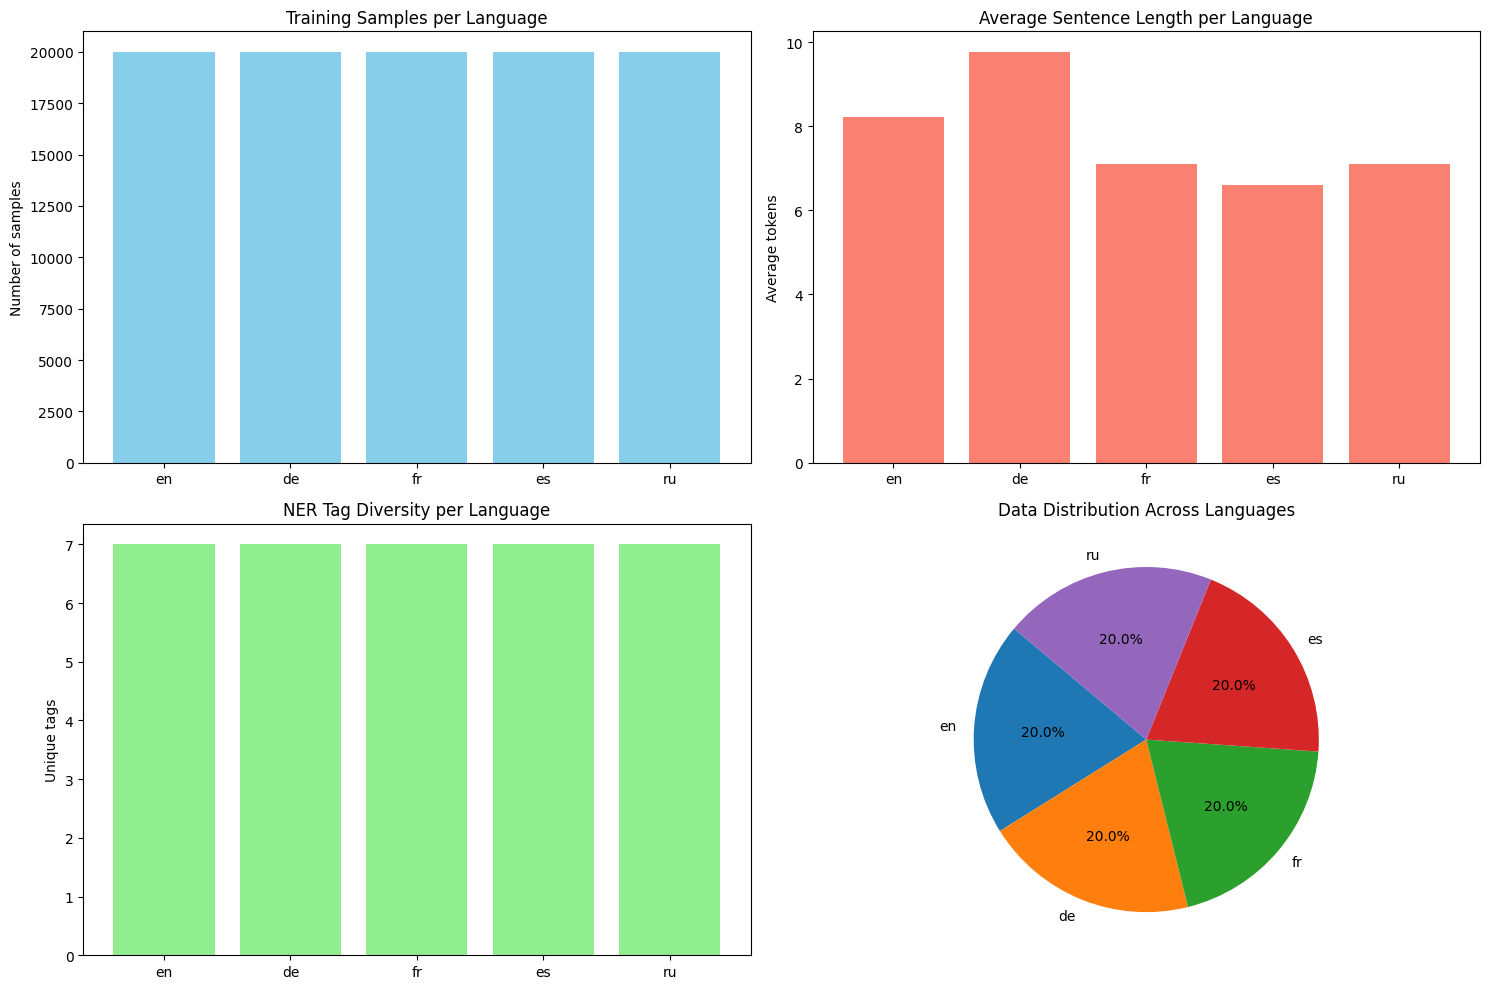

In [10]:
# Cell 8: Compare languages

def compare_languages(multilingual_data):
    comparison_stats = []
    
    for lang, dataset in multilingual_data.items():
        # Get dataset sizes
        train_size = len(dataset['train'])
        val_size = len(dataset['validation'])
        test_size = len(dataset['test'])
        
        # FIX 1: Calculate average sentence length using column-first indexing
        # Access the 'tokens' column first, then slice
        tokens_slice = dataset['train']['tokens'][:1000]
        avg_length = np.mean([len(t) for t in tokens_slice])
        
        # FIX 2: Calculate tag distribution using column-first indexing
        # Access 'ner_tags' column first to avoid TypeError
        tags_slice = dataset['train']['ner_tags'][:1000]
        # Flatten the list of lists into a single list of tags
        all_tags = [tag for sentence_tags in tags_slice for tag in sentence_tags]
        tag_diversity = len(set(all_tags))
        
        comparison_stats.append({
            'language': lang,
            'train_samples': train_size,
            'val_samples': val_size,
            'test_samples': test_size,
            'avg_sentence_length': avg_length,
            'tag_diversity': tag_diversity
        })
    
    df = pd.DataFrame(comparison_stats)
    
    # Visualization Code
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.bar(df['language'], df['train_samples'], color='skyblue')
    plt.title('Training Samples per Language')
    plt.ylabel('Number of samples')
    
    plt.subplot(2, 2, 2)
    plt.bar(df['language'], df['avg_sentence_length'], color='salmon')
    plt.title('Average Sentence Length per Language')
    plt.ylabel('Average tokens')
    
    plt.subplot(2, 2, 3)
    plt.bar(df['language'], df['tag_diversity'], color='lightgreen')
    plt.title('NER Tag Diversity per Language')
    plt.ylabel('Unique tags')
    
    plt.subplot(2, 2, 4)
    plt.pie(df['train_samples'], labels=df['language'], autopct='%1.1f%%', startangle=140)
    plt.title('Data Distribution Across Languages')
    
    plt.tight_layout()
    plt.savefig('language_comparison.png', dpi=150)
    plt.show()
    
    return df
# Uncomment to run (might take time for all languages)
multilingual_data = load_multilingual_data()
comparison_df = compare_languages(multilingual_data)

In [11]:
# Cell 9: Create data preprocessing function
def preprocess_dataset(dataset, tokenizer, max_length=128):
    """
    Preprocess dataset for NER token classification
    """
    def tokenize_and_align_labels(examples):
        tokenized_inputs = tokenizer(
            examples["tokens"],
            truncation=True,
            is_split_into_words=True,
            max_length=max_length,
            padding="max_length"
        )
        
        labels = []
        for i, label in enumerate(examples["ner_tags"]):
            word_ids = tokenized_inputs.word_ids(batch_index=i)
            previous_word_idx = None
            label_ids = []
            
            for word_idx in word_ids:
                if word_idx is None:
                    label_ids.append(-100)
                elif word_idx != previous_word_idx:
                    label_ids.append(label[word_idx])
                else:
                    # Same word as previous token
                    label_ids.append(-100)
                previous_word_idx = word_idx
            
            labels.append(label_ids)
        
        tokenized_inputs["labels"] = labels
        return tokenized_inputs
    
    return dataset.map(tokenize_and_align_labels, batched=True)

In [12]:
# Cell 10: Test preprocessing with a sample tokenizer
from transformers import AutoTokenizer

print("Testing preprocessing...")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

# Take a small sample
small_dataset = dataset['train'].select(range(10))
processed = preprocess_dataset(small_dataset, tokenizer)

print(f"Original tokens: {small_dataset[0]['tokens'][:10]}")
print(f"Tokenized input IDs: {processed[0]['input_ids'][:10]}")
print(f"Attention mask: {processed[0]['attention_mask'][:10]}")
print(f"Labels: {processed[0]['labels'][:10]}")



Testing preprocessing...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Original tokens: ['R.H.', 'Saunders', '(', 'St.', 'Lawrence', 'River', ')', '(', '968', 'MW']
Tokenized input IDs: [0, 627, 5, 841, 5, 947, 24658, 7, 15, 2907]
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [-100, 3, -100, -100, -100, 4, -100, -100, 0, 3]


In [13]:
# Cell 11: Save preprocessed dataset
def create_train_val_split(dataset, train_ratio=0.8, seed=42):
    """
    Create train/validation split if not already provided
    """
    dataset = dataset['train'].train_test_split(
        test_size=1-train_ratio, 
        seed=seed
    )
    return DatasetDict({
        'train': dataset['train'],
        'validation': dataset['test']
    })

In [14]:
# Cell 12: Export statistics to JSON
import json

def export_statistics(dataset, output_file='dataset_statistics.json'):
    stats = {
        'total_samples': len(dataset['train']) + len(dataset['validation']) + len(dataset['test']),
        'train_samples': len(dataset['train']),
        'val_samples': len(dataset['validation']),
        'test_samples': len(dataset['test']),
        'sample_metadata': {
            'tokens_per_sample': {
                'min': min([len(s['tokens']) for s in dataset['train']]),
                'max': max([len(s['tokens']) for s in dataset['train']]),
                'mean': np.mean([len(s['tokens']) for s in dataset['train']])
            }
        }
    }
    
    with open(output_file, 'w') as f:
        json.dump(stats, f, indent=2)
    
    print(f"Statistics exported to {output_file}")
    return stats

stats = export_statistics(dataset)
print(json.dumps(stats, indent=2))

Statistics exported to dataset_statistics.json
{
  "total_samples": 40000,
  "train_samples": 20000,
  "val_samples": 10000,
  "test_samples": 10000,
  "sample_metadata": {
    "tokens_per_sample": {
      "min": 2,
      "max": 439,
      "mean": 8.0197
    }
  }
}
